# Introduction

<h2>DATA</h2>

- Data are a set of values of qualitative or quantitative variables about one or more persons or objects.

<h3>Level Of Measurements</h3>

- Nominal
    - Categorical
    - No ordering or direction
    - male/female, asian countries...etc.
- Ordinal
    - Ordered Categories
    - rankings, order, scaling...etc.
- Interval
    - Difference between measurements but not true zero
    - temperature in Fahrenheit or Celcius, standartized exam score...etc.
- Ratio
    - Difference between measurements with true zero
    - hight, age, salary...etc.

<h3>Population vs Sample</h3>

- Population
    - Complete set.
    - Contains all members of a specified group.
- Sample
    - Subset of the population.
    - Measurable quality is called statistic.

<h3>Central Tendency</h3>

- Mean: Average value
- Median: Middle Value
- Mode: Most frequent value

In [1]:
import numpy as np
from scipy import stats
num = [1,2,3,5,6,7,7,10,12,13]

#Mean
mean_num = np.mean(num)
print("Mean: ", mean_num)

#Median
median_num = np.median(num)
print("Median: ", median_num)

#Mode
mode_num = stats.mode(num)
print("Mode: ", mode_num)

Mean:  6.6
Median:  6.5
Mode:  ModeResult(mode=array([7]), count=array([2]))


<h3>Dispersion</h3>

- Range: difference between min and max
- Variance: how far a set of numbers is spread out from their average value
    - 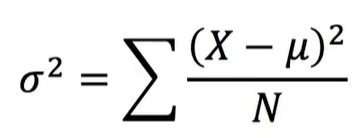
- Standart Deviation: Square root of Variance
    - 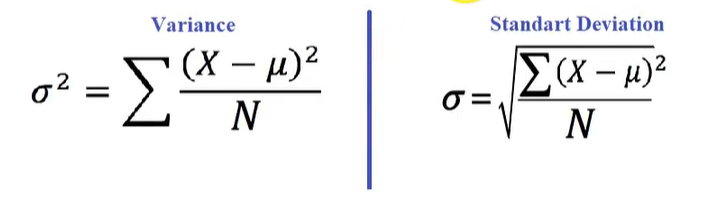

In [2]:
#range
print("Range: ", (np.max(num)-np.min(num)))

#variance
print("Variance: ", (np.var(num)))
var = sum((num-np.mean(num))**2)/len(num)
print("Variance with formula: ", var)

#standart deviation
print("Std: ", (np.std(num)))
std = np.sqrt(sum((num-np.mean(num))**2)/len(num))
print("Std with formula: ",std)

Range:  12
Variance:  15.040000000000001
Variance with formula:  15.040000000000001
Std:  3.8781438859330635
Std with formula:  3.8781438859330635


x1 mean: 15.00170599029582 and median: 14.585110573268134
x2 mean: 16.429601287352465 and median: 16.603279113140157


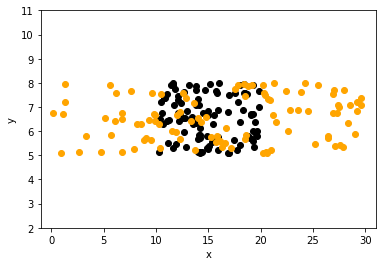

In [3]:
import matplotlib.pyplot as plt
y = np.random.uniform(5,8,100)
x1 = np.random.uniform(10,20,100)
x2 = np.random.uniform(0,30,100)
plt.scatter(x1, y, color = "black")
plt.scatter(x2, y, color = "orange")
plt.xlim([-1, 31])
plt.ylim([2, 11])
plt.xlabel("x")
plt.ylabel("y")
print("x1 mean: {} and median: {}".format(np.mean(x1),np.median(x1)))
print("x2 mean: {} and median: {}".format(np.mean(x2),np.median(x2)))

<h3>Quartiles</h3>

- 1,3,4,5,6,8,9,11,12,13,14,15,16,17
- The median is the number in the middle of the sequence (11)
- Lower quartile (Q1) (25%) (first quartile) is the median between in the smallest number and the median(1 and 11 => 6)
- Upper quartile (Q3) (75%) (third quartile) is the median between the median and the largest number(11 and 17 => 14)
- IQR (inter quartile range) = Q3-Q1
- Outliers: Outside of the range (Q1-1.5IQR and Q3+1.5IQR)

In [4]:
import pandas as pd
import seaborn as sns
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")

# read data as pandas datafrane
data = pd.read_csv("data.csv")
data = data.drop(['Unnamed: 32', 'id'], axis = 1)

In [5]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_bening.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("Outlier Range: ", lower_bound, "-", upper_bound)
data_bening[data_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ", data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

Outlier Range:  7.645000000000001 - 16.805
Outliers:  [ 6.981 16.84  17.85 ]


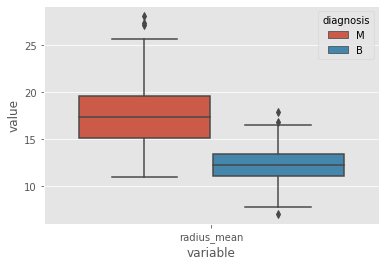

In [7]:
melted_data = pd.melt(data, id_vars = "diagnosis", value_vars = ['radius_mean'])
sns.boxplot(x = "variable", y = "value", hue= "diagnosis", data = melted_data)
plt.show()

<h3>Bivariate Data and Covariance</h3>

- Bivariate Data
    - An independent 'x' variable and dependent 'y' variable
    - Easier to control correlations

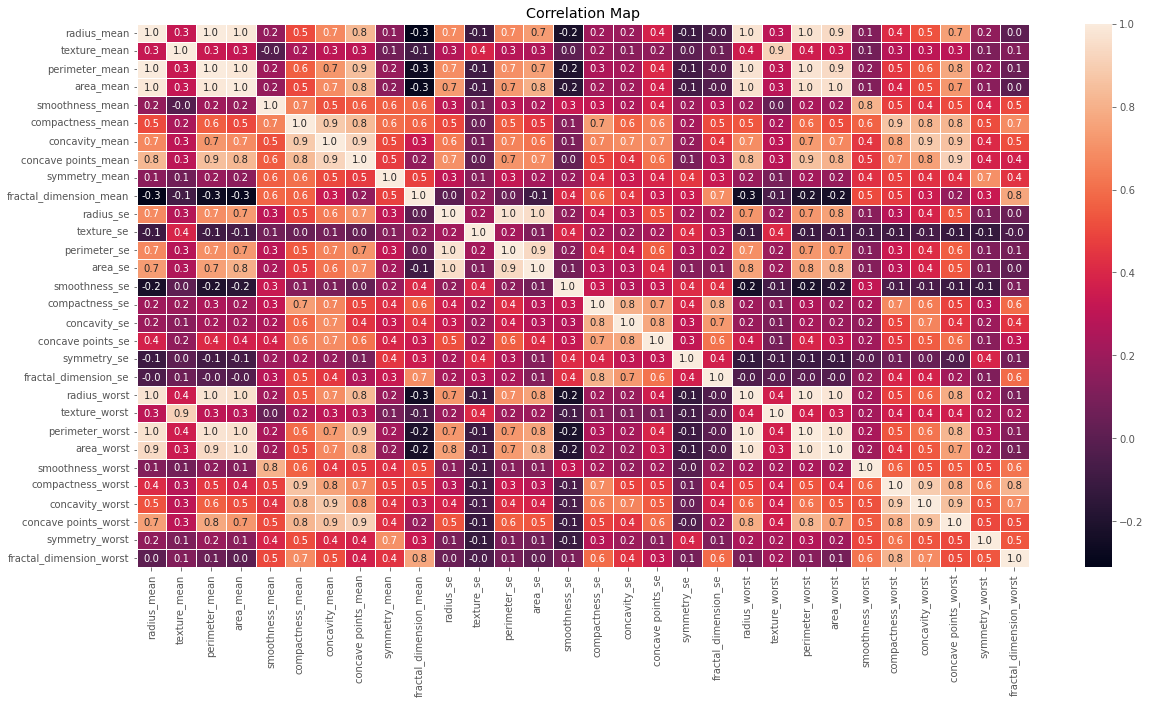

In [8]:
f,ax = plt.subplots(figsize = (20,10))
sns.heatmap(data.corr(), annot = True, linewidths = 0.5, fmt= ".1f", ax = ax)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title("Correlation Map")
plt.show()

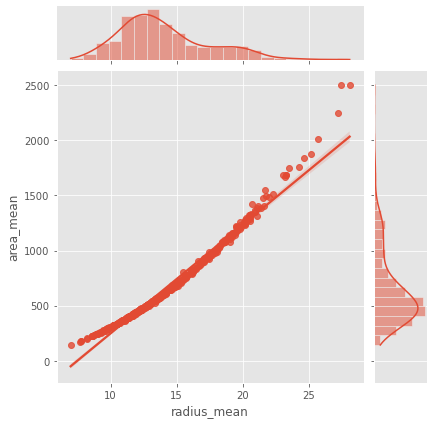

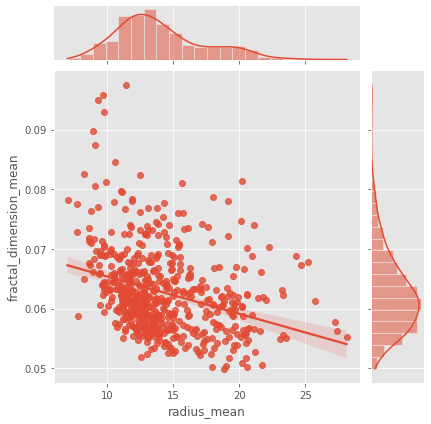

In [9]:
sns.jointplot(data.radius_mean, data.area_mean, kind = "reg")
sns.jointplot(data.radius_mean, data.fractal_dimension_mean, kind = "reg")
plt.show()

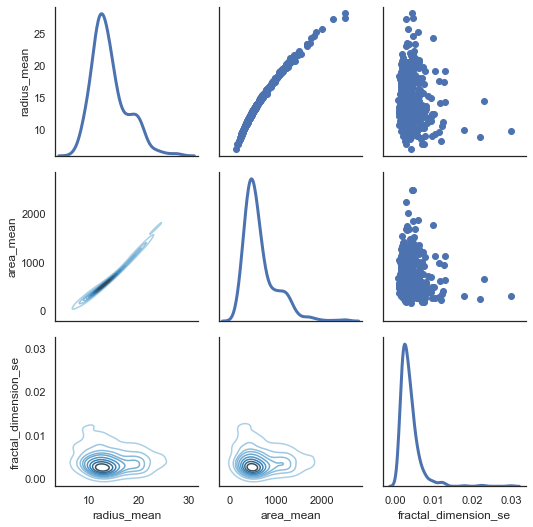

In [10]:
#relationship between more than two distribution
sns.set(style = "white")
df = data.loc[:, ["radius_mean", "area_mean", "fractal_dimension_se"]]
g = sns.PairGrid(df, diag_sharey = False)
g.map_lower(sns.kdeplot, cmap = "Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw = 3)
plt.show()

- Covariance
    - Covariance is measure the tendency of two variables to vary together.
    
    - 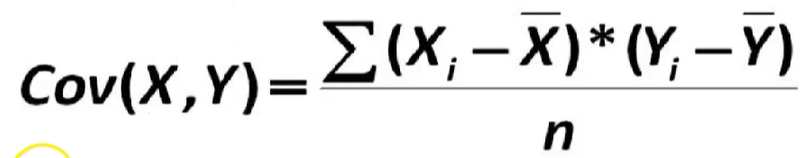
    
    - Maximum if two vector is identical
    - Mininimum if there is no relationship between two vectors
    - Negative if the direction of the vectors are different

Covariance between radius mean and area mean:  1224.4834093464565
Covariance between radius mean and fractal dimension se:  -0.00039762485764406277


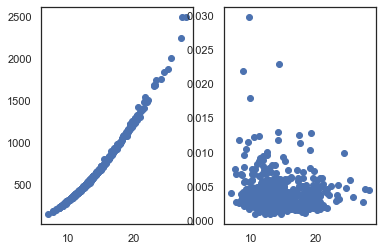

In [11]:
np.cov(data.radius_mean, data.area_mean)
print("Covariance between radius mean and area mean: ", data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension se: ", data.radius_mean.cov(data.fractal_dimension_se))
fig,axs = plt.subplots(1,2)
axs[0].scatter(data.radius_mean, data.area_mean)
axs[1].scatter(data.radius_mean, data.fractal_dimension_se)
plt.show()

<h3>Pearson's Correlation Coefficient</h3>

- Pearson's correlation coefficient is the covariance of the two variables divided by the product of their standard deviations
- Between +1 and -1
    - +1 => positive linear correlation
    - -1 => negative linear correlation
    -  0 => no linear correlation

In [12]:
p1 = data.loc[:, ["area_mean", "radius_mean"]].corr(method = "pearson")
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print("Pearson's Correlation: ")
print(p1)
print("Pearson's Correlation: ",p2)

Pearson's Correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson's Correlation:  0.9873571700566128


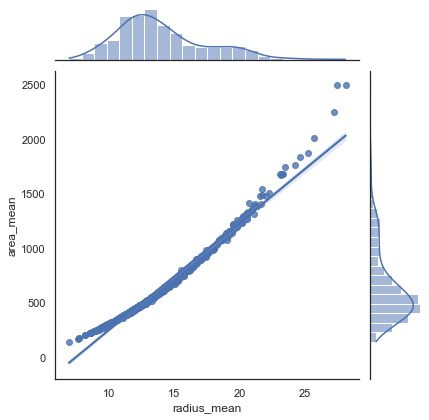

In [13]:
sns.jointplot(data.radius_mean, data.area_mean, kind = "reg")
plt.show()

<h3>Spearman's Rank Coefficient</h3>

- Pearson Correlaton works well if the relationship between variables are linear and variables are roughly normal.But it is not robust if there are outliers.
- Spearman's deals better with outliers
- To compute Spearman's Correlation we need to compute rank of each value.

In [14]:
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:, ["area_mean", "radius_mean"]].corr(method = "pearson")
print("Spearman's Correlation: ")
print(spearman_corr)

Spearman's Correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


- If relationship between distributions are non-linear, Spearman's correlation tends to better estimate the strength of relationship

<h3>Effect Size</h3>

- Describes size of an effect. Simple way to quantifying the difference between two groups.
- Effect size emphasises the size of the difference
- Use cohen effect size
- Cohen suggest that if 
    - d(effect_size) = 0.2, it is small effect size, 
    - d = 0.5, it is medium effect size
    - d= 0.8, it is large effect size
- 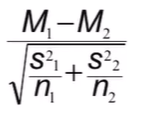

In [15]:
mean_diff = data_malignant.radius_mean.mean() - data_bening.radius_mean.mean() # M1-M2
var_bening = data_bening.radius_mean.var()
var_malignant = data_malignant.radius_mean.var()

var_pooled = (len(data_bening)*var_malignant + len(data_malignant)*var_bening) / float(len(data_bening) + len(data_malignant))
effect_size = mean_diff / np.sqrt(var_pooled)
print("Effect Size: ", effect_size)

Effect Size:  1.9256579366893174


# Probability

- Probability is simply how likely something is to happen.
- Probability is between 0 and 1.
- Simple Event: Results that can occur.
- Sample Space: Sum of all simple events.

<h2>Permutation</h2>

- Permutation is a set where each symbol used at least once.
- Permutation of a cluster which has n element is n!

- 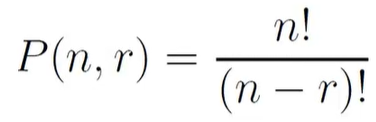
- When elements used once.

- For n = 39, r = 5 :

In [16]:
import math
numerator = math.factorial(39)
denominator = math.factorial(34)
P = int(numerator/denominator)
print(P)

69090840


- If elements can used more than one
- 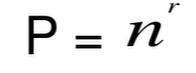

In [17]:
P2 = 39**5
print(P2)

90224199


In [18]:
x = math.factorial(3)*math.factorial(4)*2
x

288

<h2>Combination</h2>

- Combinations refer to the combination of n things taken k at a time without repetition.

- 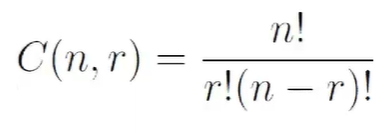

<h2>Conditional Probability</h2>

- Probability of event A given B
- P(A|B)

-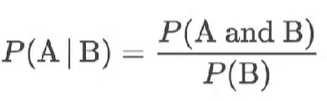

<h2>Bayes Theorem</h2>

- 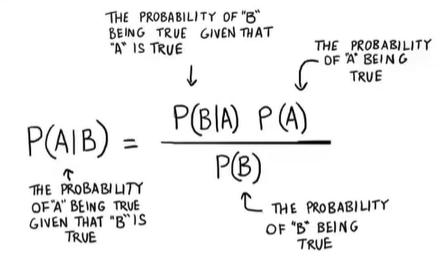

- P(A|B) => probability of event A when event B occured.
- P(A) => Probability of event A
- P(B|A) => probability of event B when event A occured.
- P(B) => probability of event B
    - P(A|B) = P(A and B) / P(B)
    - P(B|A) = P(B and A) / P(A)
    - P(A and B) = P(B and A)
    - P(A|B).P(B) = P(B|A).P(A)
    - P(A|B) = P(B|A).P(A) / P(B)

# Probability Distributions

- A probability distribution is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment.
- Sum of all individual probabilities should be one for Discrete Distributions.

<h2>Discrete Probability Distributions</h2>

- Uniform Distributions
- Binomial Distributions
- Poisson Dİstributions

<h3>Uniform Distributions</h3>

- The probability of all individual events are same. (dice)

Sample Space:  [1 2 3 4 5 6]


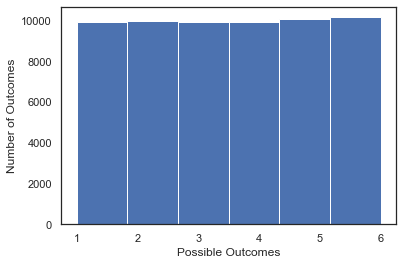

In [19]:
# dice
a = np.random.randint(1, 7, 60000)
print("Sample Space: ", np.unique(a))
plt.hist(a, bins = 6)
plt.ylabel("Number of Outcomes")
plt.xlabel("Possible Outcomes")
plt.show()

<h3>Binomial Distributions</h3>

- Trial with two discrete results. (Heads or Tails)
- Bernoulli Trial:
    - Success or failure are the results
    - n => number of trial
    - p => probability success
    - r => number of success
    - trials are independent
    - 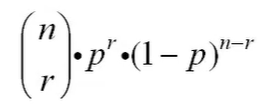

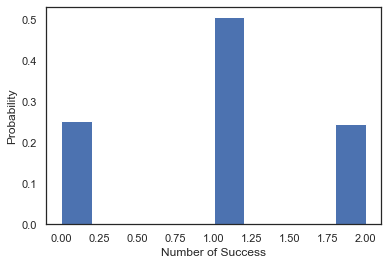

In [20]:
# heads or tails
n = 2
p = 0.5
s = np.random.binomial(n, p, 10000)
weights = np.ones_like(s)/float(len(s))
plt.hist(s, weights = weights)
plt.xlabel("Number of Success")
plt.ylabel("Probability")
plt.show()

In [21]:
# a dice rolled 10 times. probability of getting 6, 4 times.
n = 10
r = 4
p = 1/6
from scipy.stats import binom
print(binom.pmf(r, n, p))

0.054265875850988216


<h3>Poisson Distributions</h3>

- Binomial => number of successes out of n trial
- __Poisson__ => number of successes per unit of time
- lambda => number of occurences / interval

- 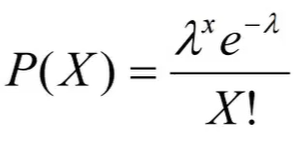

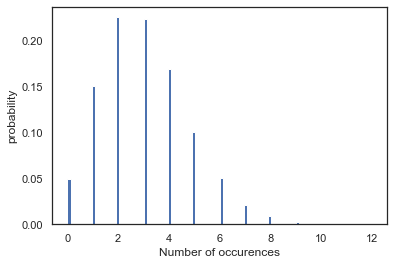

In [22]:
# average 3 truck per hour
lambda1 = 3
s1 = np.random.poisson(lambda1, 100000)
weights1 = np.ones_like(s1) / float(len(s1))
plt.hist(s1, weights = weights1, bins = 100)
plt.xlabel("Number of occurences")
plt.ylabel("probability")
plt.show()

<h2>Continuous Probability Distributions</h2>

- PDF - CDF
- Gaussian Normal Distributions

<h3>PDF - CDF</h3>

- PDF => Probability Density Function (Derivative of CDF)
- CDF => Cumulative Distribution Function (Integral of PDF)

- 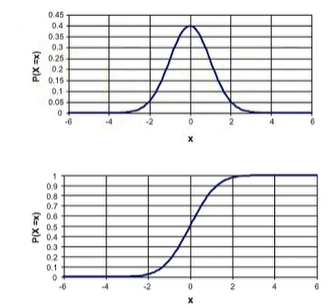

<h3>Gaussian (Normal) Distributions</h3>

- Also defined as Bell Shaped Distribution.
- Symmetric about the mean.
- Data around mean are more frequent in occurence than data far from the mean.

Mean:  110.01305358842058
Std:  20.02261007922702


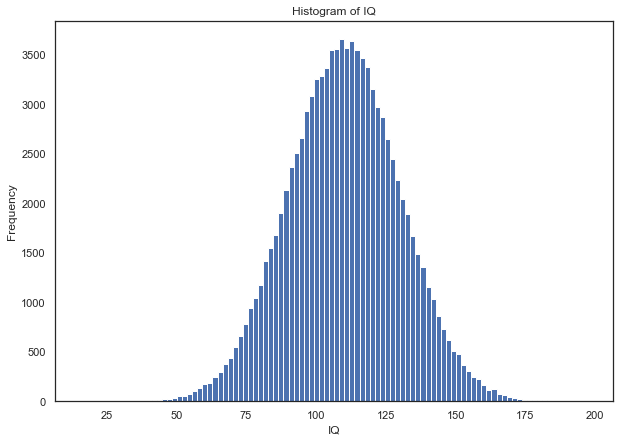

In [23]:
#parameters of normal distribution
mu, sigma = 110, 20 # mean and standart deviation
s = np.random.normal(mu, sigma, 100000)
print("Mean: ",np.mean(s))
print("Std: ",np.std(s))

plt.figure(figsize = (10, 7))
plt.hist(s, 100)
plt.ylabel("Frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()

- As it can be seen from histogram, most of the people are cumulated near to 110 that is mean of out normal distribution.
- What if I want to know what percentage of people should have an IQ score between 80 and 140 ?
    - Z-Score
    - z = (x - mean) / std
    - z1 = (80 - 100) / 20 = -1.5
    - z2 = (140 - 100) / 20 = 1.5
    - Distance between meand and 80 is 1.5std and dşstance between mean and 140 is 1.5std.
    - If you look at the z table, 1.5std corresponds to 0.4332.
    
    - 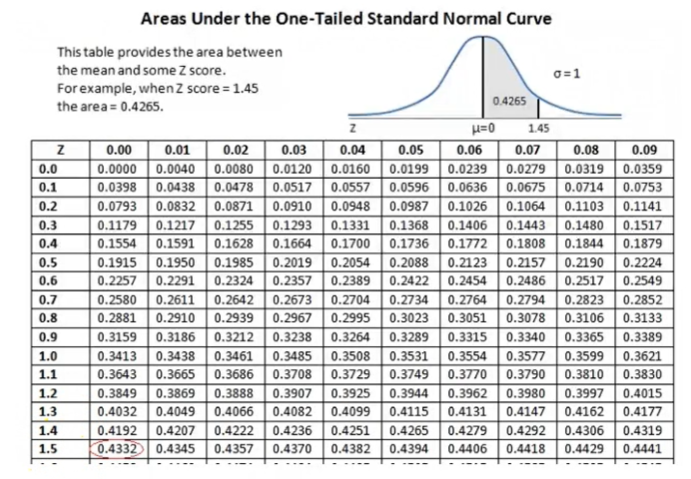
    
    - 0.4332 * 2 = 0.8664
    - 86.64% of people has an IQ between 80 and 140

# Statistics

<h2>Sampling</h2>

- Selection of a subset of individuals from within a statistical population to estimate characteristic of the population.
- Sampling Types:
    - Random Sampling
        - Just random
    - Stratified Random Sampling
        - First divide into few subsets according to their characteristics, then random.
        - Homogenity within subgroups, heterogenity between subgroups.
    - Cluster Sampling
        - Divide into many small groups, than choose from them.
        - Heterogenity within subgroups, homogenity between subgroups.

<h2>Central Limit Theorem</h2>

- The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacementtext annotation indicator, then the distribution of the sample means will be approximately normally distributed.

- 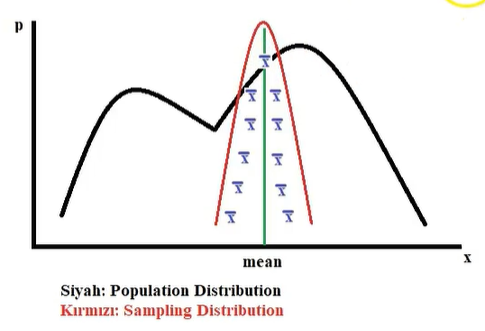 

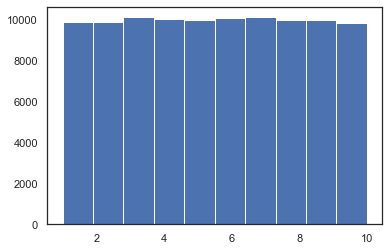

In [24]:
x = np.random.random_integers(10, size = 100000)
plt.hist(x)
plt.show()

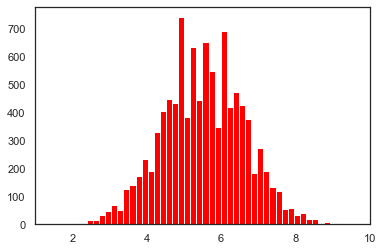

In [27]:
import random
mean_sample = []
for i in range(10000):
    sample = random.randrange(5,10)
    mean_sample.append(np.mean(random.sample(list(x),sample)))
plt.hist(mean_sample, bins = 50, color = "red")
plt.show()

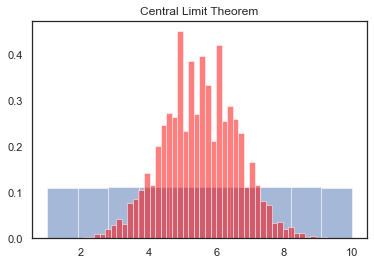

In [28]:
plt.hist(x, alpha = 0.5, density = True)
plt.hist(mean_sample, bins = 50, alpha = 0.5, color = "red", density = True)
plt.title("Central Limit Theorem")
plt.show()

<h2>Standard Error</h2>

- A measure of the statistical accuracy of an estimate, equal to the standard deviation of the theoretical distribution of a large population of such estimates.
- N => number of sample in population
- P => population parameter
- sigma => standard deviation
- n => number of sample şn subgroup after sampling
- p(ro) => sample statistic
- SE => standard error of sample

- 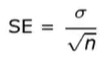

<h2>Hypothesis Testing</h2>

- Applying statistical methods to real world problems.
- To do that:
    - First define a __null hypothesis__ and accept that as True.
    - Try to reject it
    - If data rejects the null hypothesis, define __alternative hypothesises__

<h3>Real Worl Example</h3>

- A company is manking park sensor
- Sensor takes samples every 3 ms. 0.6 ms error(2.4-3.6)
    - __mean = 3 ms__ and __sigma = 0.6 ms__
- Company is trying to lower the time interval.
- Company owner 99% wants a lower time interval
    - __confidence level = 99%__ => __a = 0.01
- Engineers are developing the sensor and test it 50 times. The average time interval is now 2.8 ms
    - __n = 50__ and __new_mean = 2.8ms__
- Since there was a 0.6 ms error, the 2.8ms result might be just luck. __Hypothesis testing__ helps us findout is that luck or not.
- Hypothesis Testing:
    - Null hypothesis mean >= 3
    - Alternate hypothesis mean < 3
    - Level of significance = 0.01
- Test Type : Left tail

- 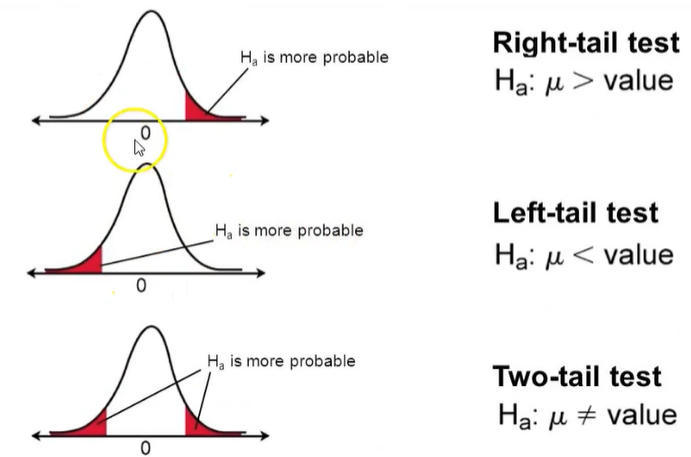

- To find P value, we use test statistic

- 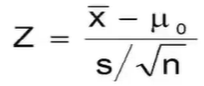

- z = 2.8 - 3 / (0.6 / root(50)) = -2.35

- 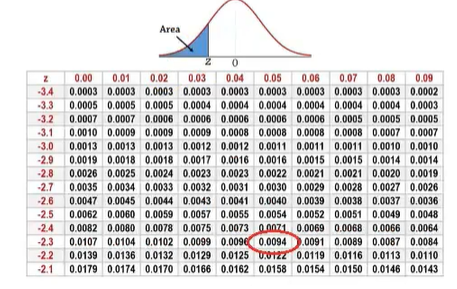

- P = 0.0094
- Since P > 0.01(level of significance), __fail to reject to Null Hypothesis__
- So, Null Hypothesis is __True__

<h3>Testing with Dataset</h3>

- Null Hyptothesis = relationship between __radius_mean__ and __area_mean__ is zero in tumor population
- Alternate Hypothesis = relationship between __radius_mean__ and __area_mean__ is not zero in tumor population.
- let's find p-value

In [29]:
statistics, p_value = stats.ttest_rel(data.radius_mean, data.area_mean)
print("P-value: ",p_value)

P-value:  1.5253492492559045e-184


- P-value is almost zero, so __reject null hypothesis__.
- Alternative hypothesis is true

<h3>Type 1 and Type 2 Errors</h3>
    
- 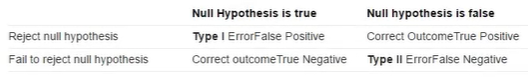
- 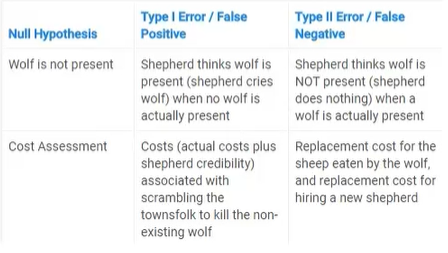

<h2>T Distribution</h2>


- The T distribution, also known as the Student's t-distribution, is a type of probability distribution that is similar to the normal distribution with its bell shape but has heavier tails.
- T distributions have a greater chance for extreme values than normal distributions, hence the fatter tails.

- 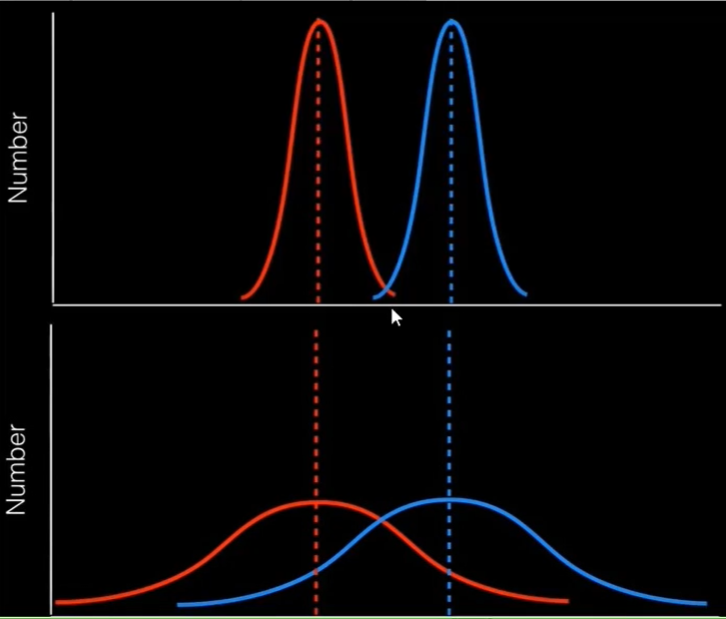
- 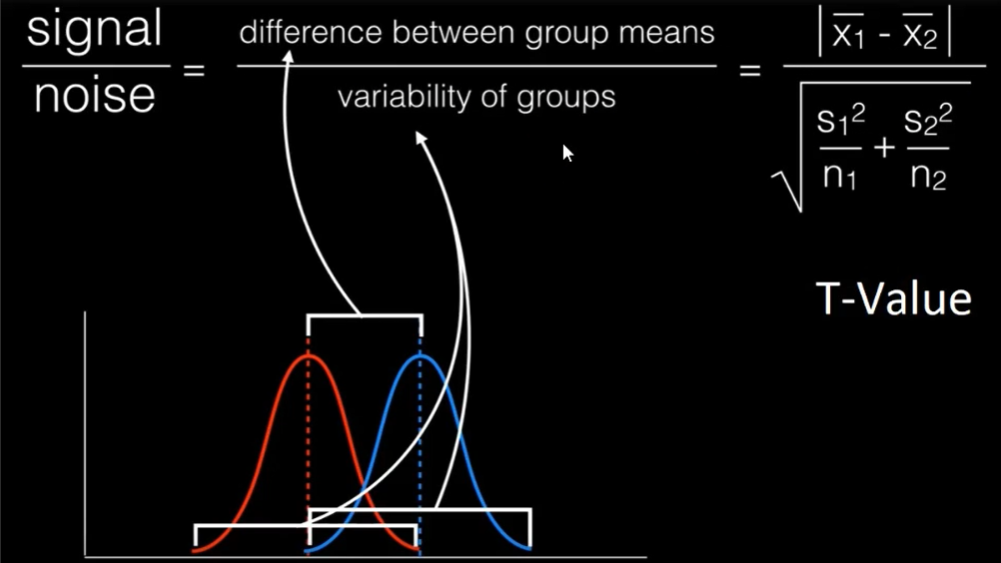

- If t value greater than critical value, fail to reject null hypothesis.
- If t value less than critical value, reject null hypothesis.
- 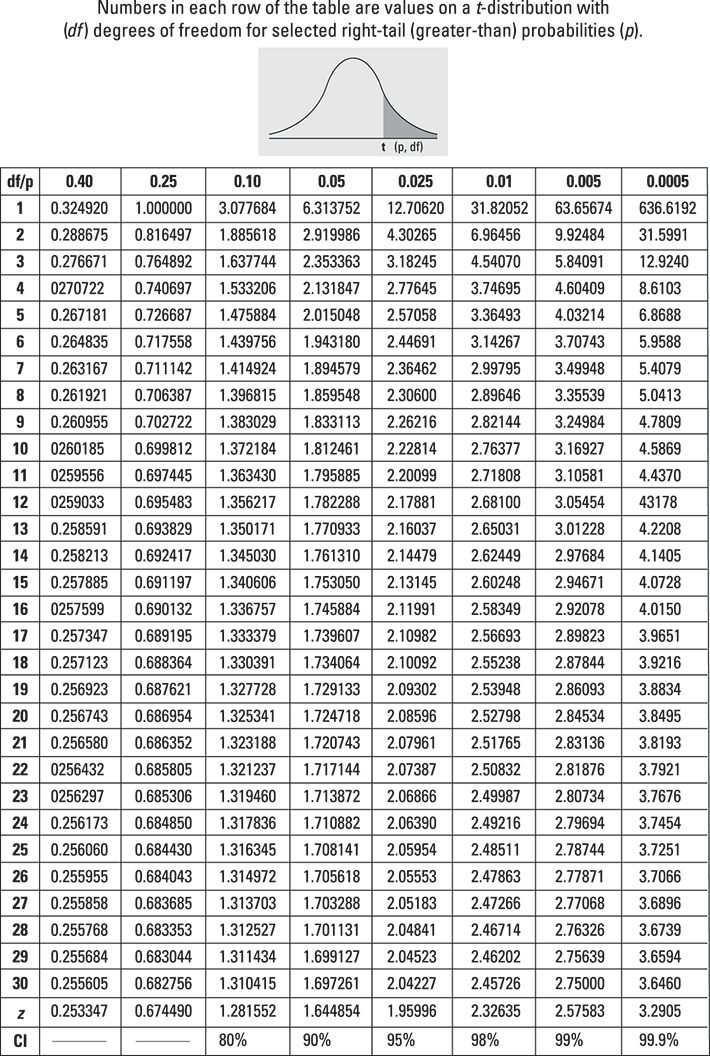

<h2>A / B Test</h2>

- Define two different model and label as A and B
- Present two different model to user.
- According to feedback, define a success rate.
- 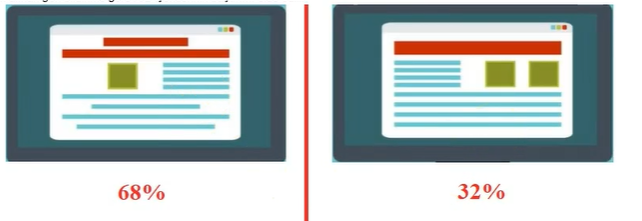

# Analysis of Variance (ANOVA)

- Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyse the differences among means.
- F value => variance between groups / variance among groups
- ANOVA can be use when there is two or more groups.
- For F value => __stats.f_oneway(group1, group2, group3)__

<h3>F Distribution</h3>

- F Distribution is not symmetric unlike Gaussian.
- 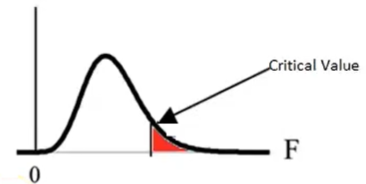

- F value < critical value => __fail to reject null hypothesis__
- F value > critical value => __reject null hypothesis__
- for F distribution table ==> http://www.socr.ucla.edu/Applets.dir/F_Table.html

# Chi-Square Analysis

- Chi-Square is used to analyse the relation between expected and observed data.
- 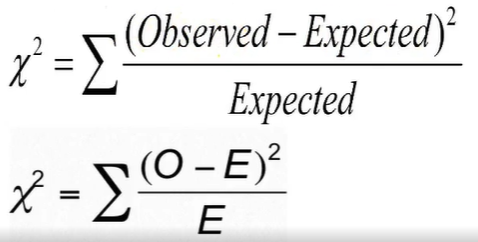

- Example: We toss a coin 10 times.
    - 9 heads and 1 tails
    - Is it logical ? Or the coin is not normal ?
    - Null hypothesis : For a normal coin, 9 heads on 10 toss is logical 95%(confidence level = 0.05)
    - for heads
        - expected frequency = 5
        - observed frequency = 9
    - for tails
        - expected frequency = 5
        - observed frequency = 1
    - according to formula
        - 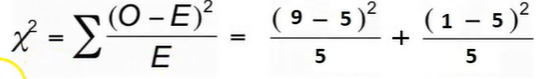
    - Chi-Square Value = 6.4
    - 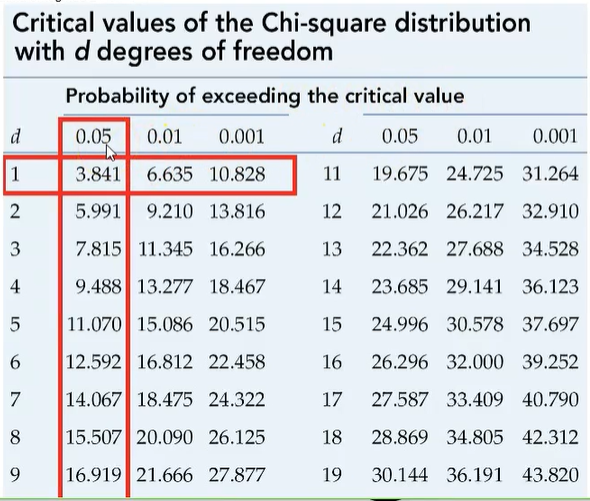
    - Since Chi-Square > Critical value (6.4 > 3.8):
        - __Reject Null Hypothesis__

# References

- https://en.wikipedia.org/wiki/Data
- https://en.wikipedia.org/wiki/Variancehttps://en.wikipedia.org/wiki/Variance
- https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
- https://www.khanacademy.org/math/statistics-probability/probability-library/basic-theoretical-probability/a/probability-the-basics
- https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html#:~:text=The%20central%20limit%20theorem%20states,will%20be%20approximately%20normally%20distributed.
- https://en.wikipedia.org/wiki/Analysis_of_variance